# Electronics Store Purchase History Project

## 1. Introduction

eCommerce has become an extremely important aspect of retail. With the pandemic and the subsequent lockdown, the ability to purchase products through an online store kept the economy running. In this project, I take on the role of an eCommerce data analyst, working with a data set from an electronics store during 2020.

### 1.1 Data Source

The data was sourced from [Kaggle](https://www.kaggle.com/datasets/mkechinov/ecommerce-purchase-history-from-electronics-store). The full data citation can be found in the README.

### 1.2 Project Goals

The main goal for this project will be to visualize and analyze the data from the electronics store with a focus on gaining insight into the sales of products over time. Is there a particular brand that sells better than others? A particular item? What brand/category sales resulted in the generation of the largest revenues? My hope is that by answering these questions, I will be able to advise the client which brands to focus on and which to avoid.

### 1.3 Importing and Inspecting the Data

My first task is importing and inspecting the data. I need to see if cleaning is necessary.

In [1]:
import pandas as pd

estore_data = pd.read_csv("kz.csv")

In [2]:
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39 UTC,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43 UTC,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21 UTC,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


When inspecting the first 5 rows of the data, there are no immediate issues that present. This is however not the case in general so more in depth examination is required.

In [3]:
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 8 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
dtypes: float64(3), int64(2), object(3)
memory usage: 160.7+ MB


Here, I can see the data set consists of 8 variables with 2.6+ million observations. The columns are a mix of `object`, `int64` and `float64` data types. The event_time column is particularly of note. It is structured as a date-time. I would like to expand this column so that I can do temporal analysis on sales. The first step is to remove `UTC` from the string.

In [4]:
estore_data.event_time = estore_data.event_time.str.replace(" UTC", '')
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18


I will now store the date and time portions in seperate columns, then expand those further into individual columns. This will allow me to track sales by each aspect of the date time variable.

In [5]:
estore_data[['date', 'time']] = estore_data.event_time.str.split(' ', expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21


In [6]:
estore_data[["year", "month", "day"]] = estore_data.date.str.split("-", expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,04,24


In [7]:
estore_data[['hour', 'minute', 'sec']] = estore_data.time.str.split(":", expand = True)
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24,11,50,39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,04,24,11,50,39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24,14,37,43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,04,24,14,37,43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,04,24,19,16,21


In [8]:
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           object 
 11  month          object 
 12  day            object 
 13  hour           object 
 14  minute         object 
 15  sec            object 
dtypes: float64(3), int64(2), object(11)
memory usage: 321.5+ MB


In [9]:
estore_data[['year', 'month', 'day', 'hour', 'minute', 'sec']] = estore_data[['year', 'month', 'day', 'hour', 'minute', 'sec']].astype('int64')
estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           int64  
 11  month          int64  
 12  day            int64  
 13  hour           int64  
 14  minute         int64  
 15  sec            int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 321.5+ MB


I now have the `event_time` data the way I want it for my analysis.

In [10]:
estore_data.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,NaN,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,4,24,19,16,21


In [11]:
estore_data.describe(include = "all")

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
count,2633521,2.633521e+06,2.633521e+06,2.201567e+06,2021319,2127516,2.201567e+06,5.641690e+05,2633521,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06
unique,1316174,NaN,NaN,NaN,510,23021,NaN,NaN,323,72303,NaN,NaN,NaN,NaN,NaN,NaN
top,1970-01-01 00:33:40,NaN,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,2020-03-07,00:33:40,NaN,NaN,NaN,NaN,NaN,NaN
freq,19631,NaN,NaN,NaN,357682,358928,NaN,NaN,24407,19631,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.361783e+18,1.674080e+18,2.273827e+18,NaN,NaN,1.540932e+02,1.515916e+18,NaN,NaN,2.019627e+03,5.507858e+00,1.544749e+01,9.044651e+00,2.958847e+01,2.949336e+01
std,NaN,1.716538e+16,3.102249e+17,2.353247e+16,NaN,NaN,2.419421e+02,2.377083e+07,NaN,NaN,4.300789e+00,2.980577e+00,8.775137e+00,3.271600e+00,1.728805e+01,1.732217e+01
min,NaN,2.294360e+18,1.515966e+18,2.268105e+18,NaN,NaN,0.000000e+00,1.515916e+18,NaN,NaN,1.970000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.348807e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.456000e+01,1.515916e+18,NaN,NaN,2.020000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.400000e+01
50%,NaN,2.353254e+18,1.515966e+18,2.268105e+18,NaN,NaN,5.553000e+01,1.515916e+18,NaN,NaN,2.020000e+03,6.000000e+00,1.500000e+01,9.000000e+00,3.000000e+01,3.000000e+01
75%,NaN,2.383131e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.967400e+02,1.515916e+18,NaN,NaN,2.020000e+03,8.000000e+00,2.300000e+01,1.100000e+01,4.400000e+01,4.400000e+01


It is quite obvious that there is a large amount of missing data in the `category_id`, `category_code`, `brand`, `price` and `user_id` columns. I will start by examining the data where `category_id` is missing.

In [12]:
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,NaN,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,NaN,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,NaN,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,NaN,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,NaN,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,NaN,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,NaN,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,NaN,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,NaN,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Looking at missing `category_id` data revealed that `category_code` and `brand` are incorrectly filled. Here, `category_code` and looks like `price` and `brand` looks like `user_id`. I will want to replace the `NaN` values in `price` and `user_id` with the corrected values from the relevant columns.

In [13]:
estore_data.price.fillna(estore_data.category_code, inplace = True)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,0.02,1515915625453675584,0.02,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,38.17,1515915625455624044,38.17,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,0.02,1515915625441101795,0.02,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,0.02,1515915625441980762,0.02,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,0.02,1515915625441293616,0.02,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,16.18,1515915625514803713,16.18,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,13.87,1515915625514803718,13.87,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,57.87,1515915625514803719,57.87,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,5.76,1515915625514155115,5.76,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Now that I have corrected the `price` data, I can work on `category_code`. Here I will replace all values that could be floats with "unknown".

In [14]:
import numpy as np

def change_float_to_nan(value):
    try:
        float(value)
        return "unknown"
    except ValueError:
        return value

estore_data.category_code = estore_data.category_code.apply(change_float_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,1515915625453675584,0.02,NaN,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,1515915625455624044,38.17,NaN,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,1515915625441101795,0.02,NaN,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,1515915625441980762,0.02,NaN,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,1515915625441293616,0.02,NaN,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,1515915625514803713,16.18,NaN,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,1515915625514803718,13.87,NaN,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,1515915625514803719,57.87,NaN,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,1515915625514155115,5.76,NaN,2020-11-19,09:54:22,2020,11,19,9,54,22


Moving on to `user_id`, I want to replace empty data with the corresponding `brand` information.

In [15]:
estore_data.user_id.fillna(estore_data.brand, inplace = True)

def change_string_to_nan(value):
    try:
        float(value)
        return value
    except ValueError:
        return np.nan
    
estore_data.user_id = estore_data.user_id.apply(change_string_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,1515915625453675584,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,1515915625455624044,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,1515915625441101795,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,1515915625441980762,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,1515915625441293616,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,1515915625514803713,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,1515915625514803718,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,1515915625514803719,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,1515915625514155115,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


I will now make a similar change to the `brand` column as was done to `category_code`.

In [16]:
estore_data.brand = estore_data.brand.apply(change_float_to_nan)
estore_data[estore_data.category_id.isna()]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,NaN,unknown,unknown,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,NaN,unknown,unknown,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,NaN,unknown,unknown,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,NaN,unknown,unknown,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,NaN,unknown,unknown,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,NaN,unknown,unknown,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,NaN,unknown,unknown,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,NaN,unknown,unknown,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,NaN,unknown,unknown,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


Finally, I can fill the missing `category_id` data. I will just use 0 as a place holder.

In [17]:
estore_data.category_id.fillna('0', inplace = True)
estore_data[estore_data.category_id == '0']

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
1812,2020-05-02 11:12:20,2300138854784434309,1515966223509353669,0,unknown,unknown,0.02,1515915625453675584,2020-05-02,11:12:20,2020,5,2,11,12,20
3633,2020-05-06 07:37:55,2302930038149874117,1515966223509128764,0,unknown,unknown,38.17,1515915625455624044,2020-05-06,07:37:55,2020,5,6,7,37,55
3918,2020-05-06 22:36:13,2303382163636093788,1515966223510204743,0,unknown,unknown,0.02,1515915625441101795,2020-05-06,22:36:13,2020,5,6,22,36,13
6015,2020-05-10 09:41:54,2305891548316827762,1515966223509353669,0,unknown,unknown,0.02,1515915625441980762,2020-05-10,09:41:54,2020,5,10,9,41,54
7802,2020-05-13 03:09:39,2307868447599493180,1515966223510600539,0,unknown,unknown,0.02,1515915625441293616,2020-05-13,03:09:39,2020,5,13,3,9,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2632423,2020-11-19 11:34:56,2388440981134693047,2388434452476082043,0,unknown,unknown,16.18,1515915625514803713,2020-11-19,11:34:56,2020,11,19,11,34,56
2632434,2020-11-19 05:38:31,2388440981134693055,1515966223523303300,0,unknown,unknown,13.87,1515915625514803718,2020-11-19,05:38:31,2020,11,19,5,38,31
2632437,2020-11-19 11:21:22,2388440981134693056,1515966223523303302,0,unknown,unknown,57.87,1515915625514803719,2020-11-19,11:21:22,2020,11,19,11,21,22
2632472,2020-11-19 09:54:22,2388440981134693073,2388434452476685318,0,unknown,unknown,5.76,1515915625514155115,2020-11-19,09:54:22,2020,11,19,9,54,22


In [18]:
estore_data[['category_id', 'price', 'user_id']] = estore_data[['category_id', 'price', 'user_id']].astype('float64')

estore_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2633521 entries, 0 to 2633520
Data columns (total 16 columns):
 #   Column         Dtype  
---  ------         -----  
 0   event_time     object 
 1   order_id       int64  
 2   product_id     int64  
 3   category_id    float64
 4   category_code  object 
 5   brand          object 
 6   price          float64
 7   user_id        float64
 8   date           object 
 9   time           object 
 10  year           int64  
 11  month          int64  
 12  day            int64  
 13  hour           int64  
 14  minute         int64  
 15  sec            int64  
dtypes: float64(3), int64(8), object(5)
memory usage: 321.5+ MB


In [19]:
estore_data.describe(include = 'all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
count,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2633521,2633521,2.633521e+06,6.027880e+05,2633521,2633521,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06,2.633521e+06
unique,1316174,NaN,NaN,NaN,124,909,NaN,NaN,323,72303,NaN,NaN,NaN,NaN,NaN,NaN
top,1970-01-01 00:33:40,NaN,NaN,NaN,unknown,unknown,NaN,NaN,2020-03-07,00:33:40,NaN,NaN,NaN,NaN,NaN,NaN
freq,19631,NaN,NaN,NaN,1044156,544624,NaN,NaN,24407,19631,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.361783e+18,1.674080e+18,1.900871e+18,NaN,NaN,1.325599e+02,1.515916e+18,NaN,NaN,2.019627e+03,5.507858e+00,1.544749e+01,9.044651e+00,2.958847e+01,2.949336e+01
std,NaN,1.716538e+16,3.102249e+17,8.422619e+17,NaN,NaN,2.268890e+02,2.373073e+07,NaN,NaN,4.300789e+00,2.980577e+00,8.775137e+00,3.271600e+00,1.728805e+01,1.732217e+01
min,NaN,2.294360e+18,1.515966e+18,0.000000e+00,NaN,NaN,0.000000e+00,1.515916e+18,NaN,NaN,1.970000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.348807e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.155000e+01,1.515916e+18,NaN,NaN,2.020000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.400000e+01
50%,NaN,2.353254e+18,1.515966e+18,2.268105e+18,NaN,NaN,4.049000e+01,1.515916e+18,NaN,NaN,2.020000e+03,6.000000e+00,1.500000e+01,9.000000e+00,3.000000e+01,3.000000e+01
75%,NaN,2.383131e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.617800e+02,1.515916e+18,NaN,NaN,2.020000e+03,8.000000e+00,2.300000e+01,1.100000e+01,4.400000e+01,4.400000e+01


There is still another issue I have to look into. The above shows that there were orders placed in 1970! That should not be possible as all this data was supposed to be from 2020.

In [20]:
estore_data[estore_data.year == 1970]

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
28813,1970-01-01 00:33:40,2340102742254551453,1515966223509354098,2.268106e+18,unknown,pastel,53.22,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28814,1970-01-01 00:33:40,2340102742439100830,1515966223509117074,2.268105e+18,unknown,samsung,30.07,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28815,1970-01-01 00:33:40,2340102742439100830,1515966223509089955,2.268105e+18,appliances.kitchen.meat_grinder,moulinex,57.85,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28816,1970-01-01 00:33:40,2340102742439100830,1515966223509297118,2.268105e+18,appliances.environment.air_heater,ava,48.59,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
28817,1970-01-01 00:33:40,2340102742439100830,1515966223509088552,2.268105e+18,electronics.smartphone,samsung,196.27,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55943,1970-01-01 00:33:40,2348533156149199497,1515966223511370167,2.268105e+18,unknown,unknown,3.91,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55944,1970-01-01 00:33:40,2348533156149199497,2273948223032787798,2.268105e+18,unknown,unknown,2.29,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55945,1970-01-01 00:33:40,2348533156149199497,2273948223032787800,2.268105e+18,unknown,unknown,10.16,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40
55946,1970-01-01 00:33:40,2348533156308583050,1515966223527009158,0.000000e+00,unknown,unknown,4.63,NaN,1970-01-01,00:33:40,1970,1,1,0,33,40


In [21]:
estore_data.year.unique()

array([2020, 1970], dtype=int64)

In [22]:
estore_data[estore_data.year == 1970].month.unique()

array([1], dtype=int64)

In [23]:
estore_data[estore_data.year == 1970].day.unique()

array([1], dtype=int64)

It appears that the 1970 date is just a place holder for missing or corrupted data. I will have to ommit these rows in my analysis for sales over time.

In [24]:
estore_data[estore_data.price == 0].product_id.nunique()

77

I now notice that there are many devices sold for reportedly $0. How much of the data does this account for?

In [25]:
estore_data[estore_data.price == 0].price.count() / estore_data.price.count() * 100

0.14588833732482104

Only ~0.15% of the data has a price value of $0. I will just remove these points for now. If I wanted to use this data, I would likely use MICE to fill in the gaps.

What about the date? As I said, if I want to conduct any time series analysis, I need to remove the 1970 dates. How much of the data does this account for?

In [26]:
estore_data[estore_data.year == 1970].year.count() / estore_data.year.count() * 100

0.7454278891263825

With only ~0.75% of the data having this odd date value, I would likely be okay removing this as well. All in all, I would only be removing a maximum of ~0.9% of the data.

In [27]:
estore_data_clean = estore_data[(estore_data.price != 0) & (estore_data.year != 1970)]

estore_data_clean.describe(include = 'all')

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec
count,2610077,2.610077e+06,2.610077e+06,2.610077e+06,2610077,2610077,2.610077e+06,6.007840e+05,2610077,2610077,2610077.0,2.610077e+06,2.610077e+06,2.610077e+06,2.610077e+06,2.610077e+06
unique,1314491,NaN,NaN,NaN,124,909,NaN,NaN,322,72293,NaN,NaN,NaN,NaN,NaN,NaN
top,2020-04-09 16:30:01,NaN,NaN,NaN,unknown,unknown,NaN,NaN,2020-03-07,16:30:01,NaN,NaN,NaN,NaN,NaN,NaN
freq,347,NaN,NaN,NaN,1031320,536114,NaN,NaN,24381,2889,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,2.361904e+18,1.674170e+18,1.904287e+18,NaN,NaN,1.328878e+02,1.515916e+18,NaN,NaN,2020.0,5.543022e+00,1.555591e+01,9.112427e+00,2.956326e+01,2.941485e+01
std,NaN,1.717552e+16,3.102992e+17,8.391448e+17,NaN,NaN,2.271134e+02,2.374920e+07,NaN,NaN,0.0,2.965625e+00,8.718057e+00,3.188446e+00,1.734993e+01,1.736266e+01
min,NaN,2.294360e+18,1.515966e+18,0.000000e+00,NaN,NaN,2.000000e-02,1.515916e+18,NaN,NaN,2020.0,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,NaN,2.348808e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.155000e+01,1.515916e+18,NaN,NaN,2020.0,3.000000e+00,8.000000e+00,7.000000e+00,1.500000e+01,1.400000e+01
50%,NaN,2.353255e+18,1.515966e+18,2.268105e+18,NaN,NaN,4.049000e+01,1.515916e+18,NaN,NaN,2020.0,6.000000e+00,1.600000e+01,9.000000e+00,3.000000e+01,2.900000e+01
75%,NaN,2.383132e+18,1.515966e+18,2.268105e+18,NaN,NaN,1.617800e+02,1.515916e+18,NaN,NaN,2020.0,8.000000e+00,2.300000e+01,1.100000e+01,4.500000e+01,4.400000e+01


In [28]:
estore_data_clean.user_id.count() / estore_data.user_id.count() * 100

99.66754480845671

I have only removed ~0.33% of the data. My data is now cleaned for analysis.

## 2. Exploratory Data Analysis

Now that my data is cleaned, I can begin my analysis. The natural starting point is univariate analysis. This will allow me to determine some summary statistics as well as get a better look at data imbalance and outliers.

### 2.1 Univarite Analysis

Because I am going to be looking at trends in sales over time, I want to get a look at the purchase price data. A simple histogram will do nicely here.

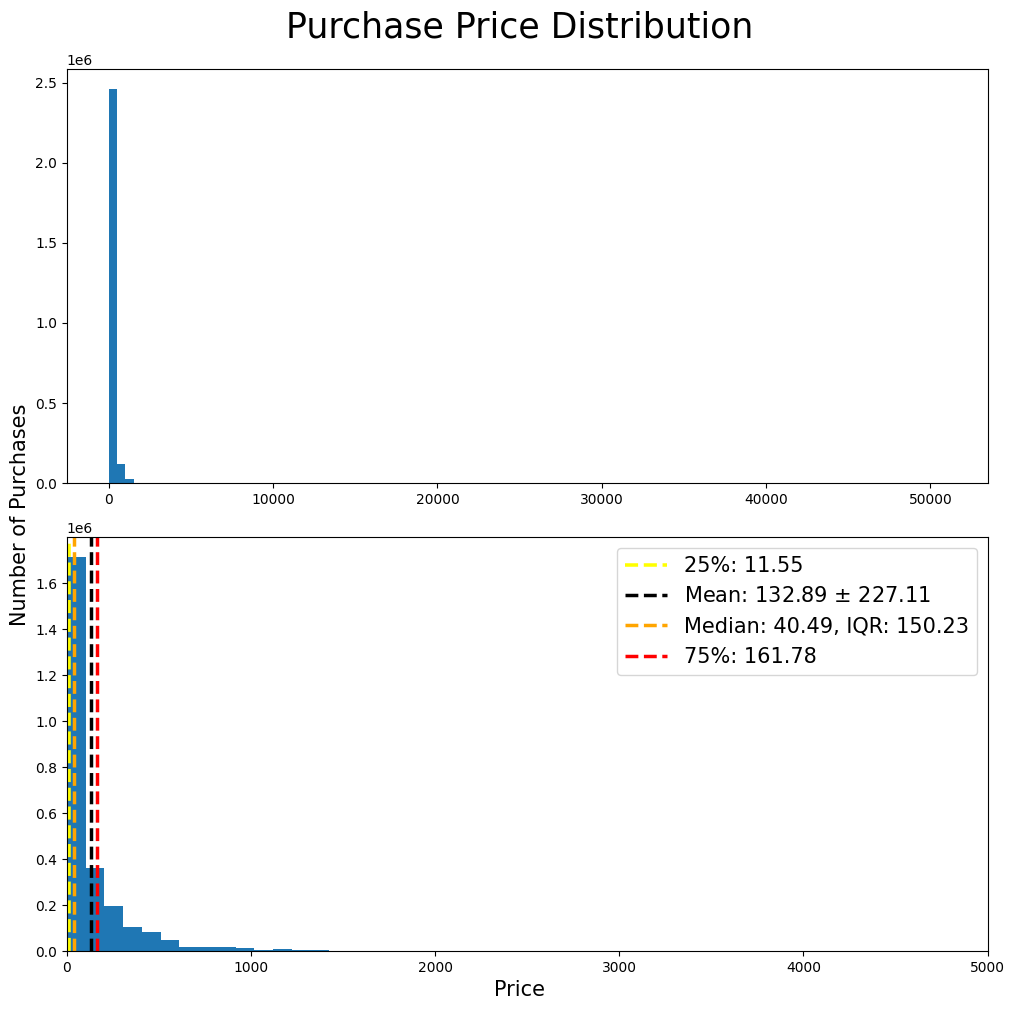

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(2,1,figsize = (10,10))

axes[0].hist(x = estore_data_clean.price, bins = 100)

axes[1].hist(x = estore_data_clean.price, bins = 500)
axes[1].set_xlim(0,5000)

axes[1].axvline(np.percentile(estore_data_clean.price, 25), color = 'yellow', linestyle = '--', linewidth = 2.55,
                label = f"25%: {np.percentile(estore_data_clean.price, 25)}")

axes[1].axvline(np.mean(estore_data_clean.price), color = 'black', linestyle = '--', linewidth = 2.5,
                label = f"Mean: {round(np.mean(estore_data_clean.price), 2)} $\pm$ {round(np.std(estore_data_clean.price), 2)}")

axes[1].axvline(np.median(estore_data_clean.price), color = 'orange', linestyle = '--', linewidth = 2.5,
                label = f"Median: {np.median(estore_data_clean.price)}, IQR: {np.percentile(estore_data_clean.price, 75) - np.percentile(estore_data.price, 25)}")

axes[1].axvline(np.percentile(estore_data_clean.price, 75), color = 'red', linestyle = '--', linewidth = 2.5,
                label = f"75%: {np.percentile(estore_data_clean.price, 75)}")


fig.text(0.5, 0, 'Price', ha='center', va='center', fontsize = 15)
fig.text(0., 0.475, 'Number of Purchases', ha='center', va='center', rotation='vertical', fontsize = 15)
plt.suptitle('Purchase Price Distribution', fontsize = 25)
plt.legend(fontsize = 15)
plt.tight_layout()
plt.show()

Obviously, the outliers in the price data are skewing the distribution. I added a reduced x-axis histogram to get a better look at the distribution of the bulk of the data. It is still not a great visualization. What if I limit myself to viewing only data with a price $\leq$ $2000.

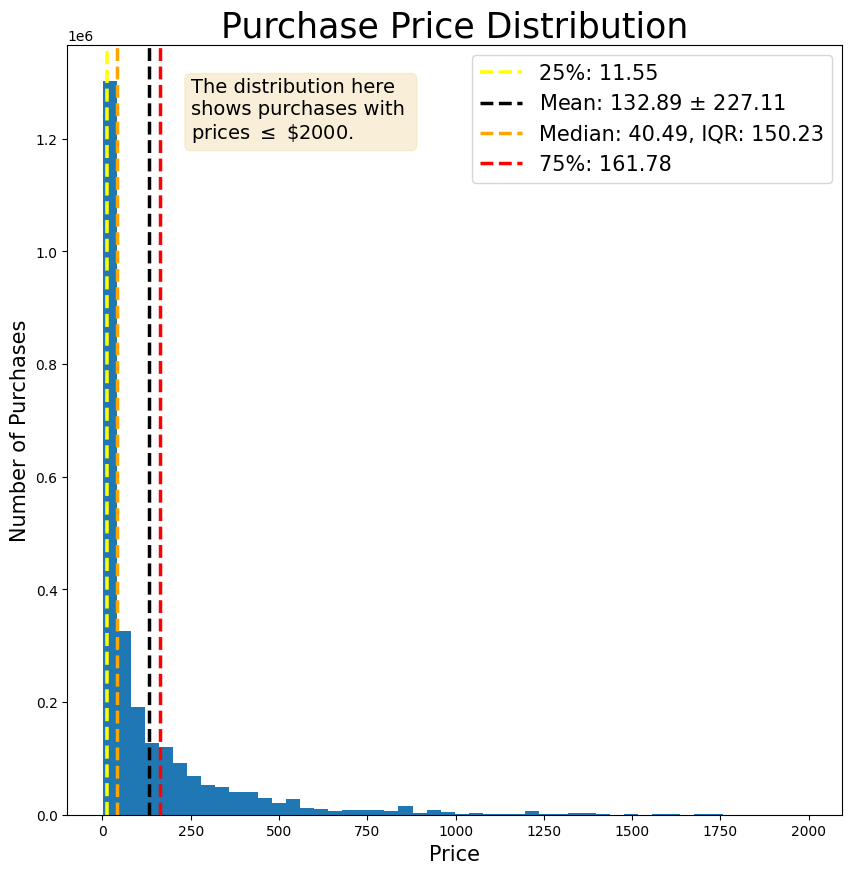

In [30]:
plt.figure(figsize = (10,10))

plt.hist(
    x = estore_data_clean[estore_data_clean.price <= 2000].price,
    bins = 50
)

plt.axvline(np.percentile(estore_data_clean.price, 25), color = 'yellow', linestyle = '--', linewidth = 2.55,
                label = f"25%: {np.percentile(estore_data_clean.price, 25)}")

plt.axvline(np.mean(estore_data_clean.price), color = 'black', linestyle = '--', linewidth = 2.5,
                label = f"Mean: {round(np.mean(estore_data_clean.price), 2)} $\pm$ {round(np.std(estore_data_clean.price), 2)}")

plt.axvline(np.median(estore_data_clean.price), color = 'orange', linestyle = '--', linewidth = 2.5,
                label = f"Median: {np.median(estore_data_clean.price)}, IQR: {np.percentile(estore_data_clean.price, 75) - np.percentile(estore_data.price, 25)}")

plt.axvline(np.percentile(estore_data_clean.price, 75), color = 'red', linestyle = '--', linewidth = 2.5,
                label = f"75%: {np.percentile(estore_data_clean.price, 75)}")

plt.title("Purchase Price Distribution", fontsize = 25)
plt.xlabel("Price", fontsize = 15)
plt.ylabel("Number of Purchases", fontsize = 15)
plt.text(250, 1200000, f"The distribution here \nshows purchases with \nprices $\leq$ \$2000.",
         fontsize = 14, bbox = {"boxstyle": 'round', "color": 'wheat', "alpha": 0.5})
plt.legend(fontsize = 15)
plt.show()

Here, it is much easier to see the shape of the distribution. Here, I see that the more inexpensive items make up the largest proportion of the sales in 2020.

Next, I would like to look at the number sold for each brand.

In [31]:
estore_data_clean.brand.nunique()

909

Looking at each of the 909 brands isn't practical. Instead, I will focus on the top ten most popular brands (including the unknown brands).

In [32]:
estore_data_brands = estore_data_clean.brand.value_counts().index[:10]
estore_data_brands

Index(['unknown', 'samsung', 'ava', 'tefal', 'apple', 'huawei', 'lg',
       'philips', 'neo', 'polaris'],
      dtype='object')

In [33]:
brands_other = lambda brand: brand if brand in estore_data_brands else "other"

estore_data_clean['top_brands'] = estore_data_clean.brand.apply(brands_other)
estore_data_clean.top_brands.unique()

C:\Users\zcron\AppData\Local\Temp\ipykernel_12792\387770077.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estore_data_clean['top_brands'] = estore_data_clean.brand.apply(brands_other)


array(['samsung', 'huawei', 'other', 'apple', 'lg', 'polaris', 'philips',
       'unknown', 'tefal', 'ava', 'neo'], dtype=object)

In [34]:
estore_data_clean.top_brands.value_counts()

other      1201159
unknown     536114
samsung     356459
ava         117480
tefal        78147
apple        74051
huawei       56657
lg           55343
philips      51912
neo          42321
polaris      40434
Name: top_brands, dtype: int64

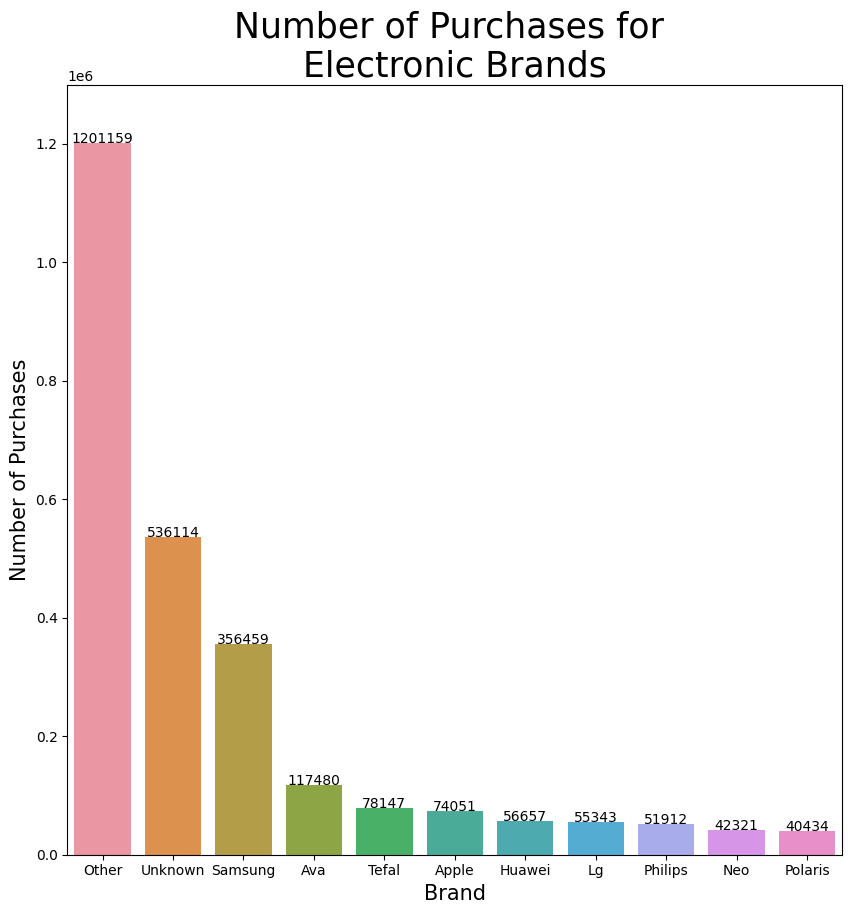

In [35]:
plt.figure(figsize = (10,10))

ax = sns.countplot(
    x = "top_brands",
    data = estore_data_clean,
    order = estore_data_clean.top_brands.value_counts().index
)

for i in range(len(estore_data_clean.top_brands.value_counts().index)):
    ax.annotate(str(estore_data_clean.top_brands.value_counts()[i]),
                xy = (i, estore_data_clean.top_brands.value_counts()[i]),
               horizontalalignment = 'center')

ax.set_ylim(0, 1300000)
ax.set_xticklabels([brand.title() for brand in estore_data_clean.top_brands.value_counts().index])
ax.set_xlabel('Brand', fontsize = 15)
ax.set_ylabel('Number of Purchases', fontsize = 15)
ax.set_title('Number of Purchases for \nElectronic Brands', fontsize = 25)
plt.show()

Here I can see that over half of the sales in 2020 are "Other/Unknown". This isn's so surpising given that there are 899 brands accounted for in the "Other" category.

Before I do a similar analysis for the category code variable, I want to make my categories more consistent. With some of the issues with messy data I have, I am worried that the category code labeling will be inconsistent. upon initial inspection it looks like that the data is encoded in a `department.subdepartment.item` format. I will add a column to my dataframe for just the item information.

In [36]:
estore_data_clean['item_category'] = estore_data_clean.category_code.str.split('.').str[-1]
estore_data_clean.item_category.head()

C:\Users\zcron\AppData\Local\Temp\ipykernel_12792\2881620622.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estore_data_clean['item_category'] = estore_data_clean.category_code.str.split('.').str[-1]


0       tablet
1       tablet
2    headphone
3    headphone
4      unknown
Name: item_category, dtype: object

Now that I have the item category in a more consistant format, I want to use the same conditional logic for analysis as I used with the brand - that is, I want to limit myself to only the top ten selling item categories.

In [37]:
estore_data_items = estore_data_clean.item_category.value_counts().index[:10]
estore_data_items

Index(['unknown', 'smartphone', 'refrigerators', 'notebook', 'tv', 'vacuum',
       'headphone', 'kettle', 'washer', 'table'],
      dtype='object')

In [38]:
estore_items_lambda = lambda item: item if item in estore_data_items else 'other'

estore_data_clean.item_category = estore_data_clean.item_category.apply(estore_items_lambda)

estore_data_clean.item_category.unique()

C:\Users\zcron\AppData\Local\Temp\ipykernel_12792\1408063823.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  estore_data_clean.item_category = estore_data_clean.item_category.apply(estore_items_lambda)


array(['other', 'headphone', 'unknown', 'table', 'smartphone',
       'refrigerators', 'tv', 'notebook', 'kettle', 'washer', 'vacuum'],
      dtype=object)

In [39]:
estore_data_clean.item_category.value_counts().index

Index(['unknown', 'other', 'smartphone', 'refrigerators', 'notebook', 'tv',
       'vacuum', 'headphone', 'kettle', 'washer', 'table'],
      dtype='object')

Just going to do a quick check of the data integrity.

In [40]:
estore_data_clean.head()

,event_time,order_id,product_id,category_id,category_code,brand,price,user_id,date,time,year,month,day,hour,minute,sec,top_brands,item_category
0,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39,samsung,other
1,2020-04-24 11:50:39,2294359932054536986,1515966223509089906,2.268105e+18,electronics.tablet,samsung,162.01,1.515916e+18,2020-04-24,11:50:39,2020,4,24,11,50,39,samsung,other
2,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43,huawei,headphone
3,2020-04-24 14:37:43,2294444024058086220,2273948319057183658,2.268105e+18,electronics.audio.headphone,huawei,77.52,1.515916e+18,2020-04-24,14:37:43,2020,4,24,14,37,43,huawei,headphone
4,2020-04-24 19:16:21,2294584263154074236,2273948316817424439,2.268105e+18,unknown,karcher,217.57,1.515916e+18,2020-04-24,19:16:21,2020,4,24,19,16,21,other,unknown


I will now use a count plot again to look at the number of items sold within the top ten selling item category.

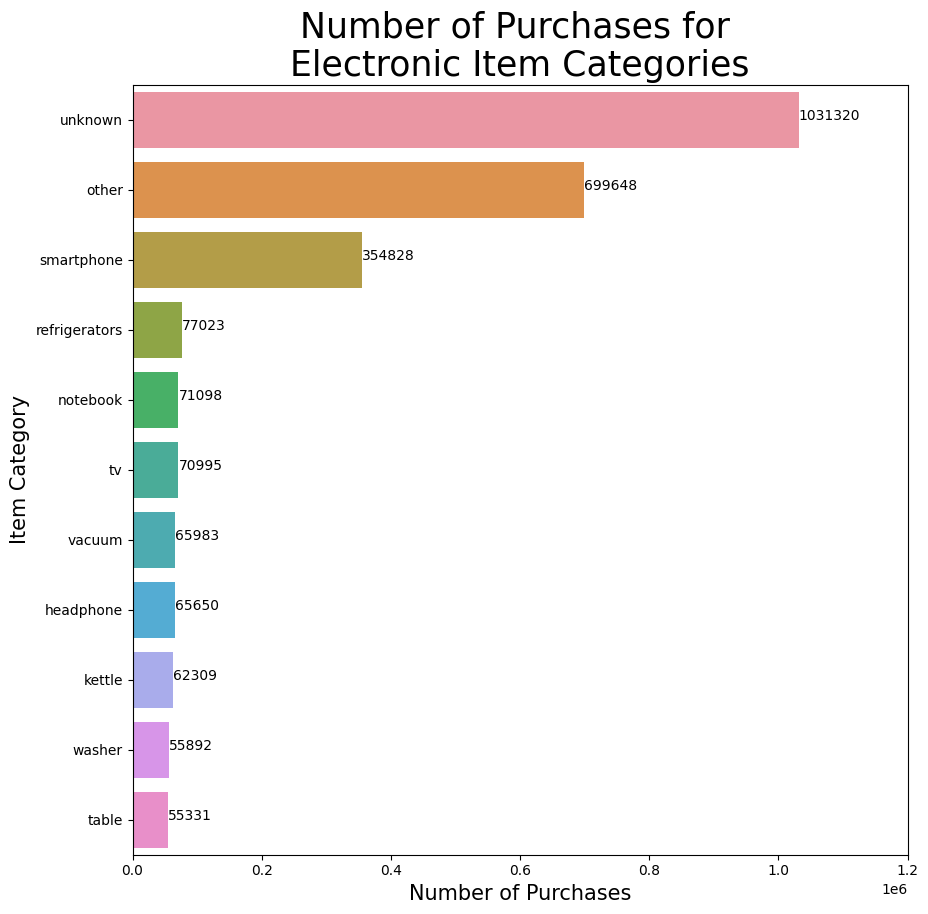

In [41]:
plt.figure(figsize = (10,10))

ax = sns.countplot(
    y = "item_category",
    data = estore_data_clean,
    order = estore_data_clean.item_category.value_counts().index
)

for i in range(len(estore_data_clean.item_category.value_counts().index)):
    ax.annotate(str(estore_data_clean.item_category.value_counts()[i]), xy = (estore_data_clean.item_category.value_counts()[i], i))

ax.set_xlim(0, 1200000)
ax.set_ylabel('Item Category', fontsize = 15)
ax.set_xlabel('Number of Purchases', fontsize = 15)
ax.set_title('Number of Purchases for \nElectronic Item Categories', fontsize = 25)
plt.show()

Again, most of the data is assigned an "unknown/other" label. Which of these brands/item categories generated the most revenue on 2020?

### 2.2 Bivariate Analysis

I now want to get into the multi-feature analysis to try and see if there are any trends within the data. My first questions are: What electronics brands typically most expensive, which brands produced the largest revenues and what proportion of the total revenue each of those corresponded to? I would like to extend this analysis to the item category as well.

In [42]:
estore_data_clean.groupby('top_brands').price.mean().sort_values(ascending = False)

top_brands
apple      641.850491
lg         469.717233
samsung    251.244403
huawei     187.865744
other      112.067240
philips     82.449053
tefal       82.035992
ava         72.331857
polaris     38.685765
neo         38.130588
unknown     30.110968
Name: price, dtype: float64

In [43]:
estore_data_clean.groupby('top_brands').price.sum().sort_values(ascending = False)

top_brands
other      1.346106e+08
samsung    8.955833e+07
apple      4.752967e+07
lg         2.599556e+07
unknown    1.614291e+07
huawei     1.064391e+07
ava        8.497547e+06
tefal      6.410867e+06
philips    4.280095e+06
neo        1.613725e+06
polaris    1.564220e+06
Name: price, dtype: float64

In [44]:
estore_data_clean.groupby('top_brands').price.sum().sort_values(ascending = False) / estore_data_clean.price.sum() * 100

top_brands
other      38.809739
samsung    25.820671
apple      13.703337
lg          7.494812
unknown     4.654183
huawei      3.068759
ava         2.449938
tefal       1.848325
philips     1.233999
neo         0.465255
polaris     0.450982
Name: price, dtype: float64

In [45]:
estore_data_clean.groupby('item_category').price.mean().sort_values(ascending = False)

item_category
notebook         439.551194
tv               408.732846
refrigerators    407.147325
washer           328.245325
smartphone       287.281343
vacuum           139.041101
other            102.313115
headphone         65.116380
unknown           44.377003
table             38.141280
kettle            32.532325
Name: price, dtype: float64

In [46]:
estore_data_clean.groupby('item_category').price.sum().sort_values(ascending = False)

item_category
smartphone       1.019355e+08
other            7.158317e+07
unknown          4.576689e+07
refrigerators    3.135971e+07
notebook         3.125121e+07
tv               2.901799e+07
washer           1.834629e+07
vacuum           9.174349e+06
headphone        4.274890e+06
table            2.110395e+06
kettle           2.027057e+06
Name: price, dtype: float64

In [47]:
estore_data_clean.groupby('item_category').price.sum().sort_values(ascending = False) / estore_data_clean.price.sum() * 100

item_category
smartphone       29.389138
other            20.638230
unknown          13.195108
refrigerators     9.041356
notebook          9.010075
tv                8.366212
washer            5.289441
vacuum            2.645068
headphone         1.232499
table             0.608451
kettle            0.584423
Name: price, dtype: float64

Now I can say that the top three brands interms of generation of revenue are Samsung, Apple and LG while Phillips, Neo and Polaris produced the least. The highest revenues were generated by smartphones, refigerators, and notebooks and the lowest revenues were generated by headphones, tables and kettles.

It is impossible to know if the "unknown" categories in both item category and brand correspond to one item or brand or to many.

To better visualize the above, I will employ box plot analysis.

In [ ]:
fig, axes = plt.subplots(2,1,figsize = (10,10))

sns.boxplot(
    y = "top_brands",
    x = "price",
    data = estore_data_clean,
    order = estore_data_clean.groupby('top_brands').price.median().sort_values(ascending = False).index,
    ax = axes[0]
)
axes[0].set_xlim(0, estore_data_clean.price.max() + 1000)
axes[0].set_xlabel("")
axes[0].set_ylabel("")
axes[0].set_yticklabels([brand.title() for brand in estore_data_clean.groupby('top_brands').price.median().sort_values(ascending = False).index],
                       fontsize = 10)

sns.boxplot(
    y = "top_brands",
    x = "price",
    data = estore_data_clean,
    order = estore_data_clean.groupby('top_brands').price.median().sort_values(ascending = False).index,
    ax = axes[1]
)
axes[1].set_xlim(0,3000)
axes[1].set_xlabel('Price', fontsize = 15)
axes[1].set_ylabel("")
axes[1].set_yticklabels([brand.title() for brand in estore_data_clean.groupby('top_brands').price.median().sort_values(ascending = False).index],
                       fontsize = 10)

fig.suptitle('Purchase Price Distribution \nfor the Top Brands', fontsize = 25)
fig.text(-0.02, 0.46, 'Brand', fontsize = 15, rotation = 'vertical')
fig.text(0.4, 0.8, "These boxplots display summary statistics\nfor the 10 best selling brands by number \nsold. They have been ordered by decreasing \nmedian price.",
        bbox = {"boxstyle": 'round', "color": 'wheat', "alpha": 0.5}, fontsize = 14)
fig.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(2,1,figsize = (10,10))

sns.boxplot(
    y = "item_category",
    x = "price",
    data = estore_data_clean,
    order = estore_data_clean.groupby('item_category').price.median().sort_values(ascending = False).index,
    ax = axes[0]
)
axes[0].set_xlim(0, estore_data_clean.price.max() + 1000)
axes[0].set_xlabel("")
axes[0].set_ylabel("")

sns.boxplot(
    y = "item_category",
    x = "price",
    data = estore_data_clean,
    order = estore_data_clean.groupby('item_category').price.median().sort_values(ascending = False).index,
    ax = axes[1]
)
axes[1].set_xlim(0,3000)
axes[1].set_xlabel('Price', fontsize = 15)
axes[1].set_ylabel("")

fig.suptitle('Purchase Price Distribution \nfor the Top Categories', fontsize = 25)
fig.text(-0.02, 0.42, 'Item Category', fontsize = 15, rotation = 'vertical')
fig.text(0.4, 0.7, "These boxplots display summary statistics\nfor the 10 best selling categories by number \nsold. They have been ordered by decreasing \nmedian price.",
        bbox = {"boxstyle": 'round', "color": 'wheat', "alpha": 0.5}, fontsize = 14)
fig.tight_layout()
plt.show()

The box plots reveal much of the same information as the tables above, it is now just presented in a more easily understandable format.

As I said in my Introduction section, the min goal for this project will be to conduct time series analysis on sales to inspect data trends. I will start with some aggregate stats.

In [ ]:
monthly_sales = estore_data_clean.groupby('month').price.sum()
monthly_sales

The best month in 2020 was August while the worst month was April. This huge drop in revenue was likely due to the beginning of the Covid-19 pandemic in mid-March 2020.

In [ ]:
plt.figure(figsize = (10,10))

plt.plot(
    monthly_sales.index,
    monthly_sales / 10 ** 6
)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Total Sales (tens of millions)', fontsize = 15)
plt.title('Total Sales Revenues in 2020', fontsize = 25)
plt.show()

The total monthly sales plot above shows some signature of seasonality in the data. It looks like the total sales generally increases for three months, followed by a sharp decline in the the next month. This is consistent with the 4 month seaonsality of Covid-19.

In [ ]:
average_monthly_sales = estore_data_clean.groupby('month').price.mean()
average_monthly_sales

In [ ]:
plt.figure(figsize = (10,10))
 
plt.plot(
    average_monthly_sales.index,
    average_monthly_sales
)

plt.xlabel('Month', fontsize = 15)
plt.ylabel('Average Item Sale Price', fontsize = 15)
plt.title('Avearge Sale Revenue in 2020', fontsize = 25)
plt.show()

When looking at the average electronics purchase price, I see a general increase in the cost of electronics sold. This could be a by product of increasing inflation brought about by the global chip shortage.

In [ ]:
total_daily_sales = estore_data_clean.groupby('date').price.sum()
total_daily_sales.head()

In [ ]:
estore_data_clean["date"] = pd.to_datetime(estore_data_clean["date"])

date = estore_data_clean["date"].sort_values().unique()
value = estore_data_clean.groupby('date')["price"].sum()

import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(8, 6))

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value/1000000)
fig.autofmt_xdate()
ax.set_ylabel('Revenue (millions USD)')
ax.set_title('Total Revenues From 2020')
plt.tight_layout()
plt.show()

Looking at the daily total revenues, I can see a weekly seasonality. I also see an approximate four month seasonality beginning in late March/early April 2020. I will need to take these into account when I begin forcasting.

To help visually, I will add a moving average to the plot for a preliminary trend analysis.

In [ ]:
weekly_rolling_price_sum = estore_data_clean.groupby("date").price.sum().rolling("7D").mean()
weekly_rolling_price_sum.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value)
ax.plot(date, weekly_rolling_price_sum, linestyle = '--', linewidth = 2, color = 'black', label = "Seven Day Rolling Average")
fig.autofmt_xdate()
plt.legend()
plt.show()

In [ ]:
monthly_rolling_prices_sum = estore_data_clean.groupby("date").price.sum().rolling("30D").mean()
monthly_rolling_prices_sum.head()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 6))

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value)
ax.plot(date, monthly_rolling_prices_sum, linestyle = '--', linewidth = 2, color = 'black', label = "Monthly Rolling Average")
fig.autofmt_xdate()
plt.legend()
plt.show()

In [ ]:
biweekly_rolling_prices_sum = estore_data_clean.groupby("date").price.sum().rolling("14D").mean()

fig, ax = plt.subplots(figsize=(8, 6))

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

ax.plot(date, value)
ax.plot(date, biweekly_rolling_prices_sum, linestyle = '--', linewidth = 2, color = 'black', label = "14 Day Rolling Average")
fig.autofmt_xdate()
plt.legend()
plt.show()

The above shows that the sales are likely leveling out or slightly decreasing heading into Decemeber 2020.

### 2.3 Multivariate Analysis

While I have looked at the stores total sales, I suspect that the brand and item category will play a role in how well an item is selling. I will start by looking through a few pivot tables to get an idea as to how some aggregate statistics change with each item category/brand pair.

In [ ]:
pd.pivot_table(data = estore_data_clean,
               index = 'top_brands',
               columns = 'item_category',
               values = 'price',
               aggfunc = np.sum,
               margins = True,
               margins_name = 'Grand Total')

In [ ]:
pd.pivot_table(data = estore_data_clean,
               index = 'top_brands',
               columns = 'item_category',
               values = 'price',
               aggfunc = 'mean',
               margins = True,
               margins_name = 'Average')

In [ ]:
pd.pivot_table(data = estore_data_clean,
               index = 'top_brands',
               columns = 'item_category',
               values = 'price',
               aggfunc = 'median',
               margins = True,
               margins_name = 'Median')

The 12x12 grid is cumbersome to look at. Let's instead look at time series plots for each brand and item category individually.

In [ ]:
fig, axes = plt.subplots(len(estore_data_clean.top_brands.unique()), 1, figsize = (8,20))    

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

for brand,ax in zip(estore_data_clean.top_brands.unique(), axes.ravel()):

    date = estore_data_clean[estore_data_clean["top_brands"] == brand].date.sort_values().unique()
    value = estore_data_clean[estore_data_clean["top_brands"] == brand].groupby('date')["price"].sum()
    biweekly_rolling_prices_sum = estore_data_clean[estore_data_clean["top_brands"] == brand].groupby("date").price.sum().rolling("14D").mean()
    ax.plot(date, value)
    ax.plot(date,
            biweekly_rolling_prices_sum,
            linestyle = '--',
            linewidth = 2,
            color = 'black',
            label = " 14 Day Rolling Average")
    ax.set_title(brand.title())
    fig.autofmt_xdate()
    ax.legend(loc = 'upper left')

plt.xlabel('Date')
plt.suptitle('Daily Revenue for the Top Ten Brands by Number of Items Sold', x = 0.55, y = 1.005)
plt.tight_layout()
plt.show()

In [ ]:
fig, axes = plt.subplots(len(estore_data_clean.item_category.unique()), 1, figsize = (8,20))    

month_locator = mdates.MonthLocator(interval=1)
year_month_formatter = mdates.DateFormatter("%Y-%m") # four digits for year, two for month

ax.xaxis.set_major_locator(month_locator)
ax.xaxis.set_major_formatter(year_month_formatter) # formatter for major axis only

for cat,ax in zip(estore_data_clean.item_category.unique(), axes.ravel()):

    date = estore_data_clean[estore_data_clean["item_category"] == cat].date.sort_values().unique()
    value = estore_data_clean[estore_data_clean["item_category"] == cat].groupby('date')["price"].sum()
    biweekly_rolling_prices_sum = estore_data_clean[estore_data_clean["item_category"] == cat].groupby("date").price.sum().rolling("14D").mean()
    ax.plot(date, value)
    ax.plot(date,
            biweekly_rolling_prices_sum,
            linestyle = '--',
            linewidth = 2,
            color = 'black',
            label = " 14 Day Rolling Average")
    ax.set_title(cat.title())
    fig.autofmt_xdate()
    ax.legend(loc = 'upper left')

plt.xlabel('Date')
plt.suptitle('Daily Revenue for the Top Ten Item Categories by Number of Items Sold', x = 0.55, y = 1.005)
plt.tight_layout()
plt.show()

Many of the items and brands share similar seasonality with the overall sales. The most interesting plots to me are the Huawei, notebook and headphone time-series plots. 

Why did Huawei's revenue not bounce back the way the others did? This is likely due to the suspicion that the Chinese government was using the phone manufacturer to collect data.

Both notebooks and headphones saw a huge increase in revenue in August and September, respectively. This is likely due to the transition to work from home while the lockdowns were still in place.

## 3. Forcasting to the Future

The main goal of this project is gain insight into the overall trends to predict future performance. I will look to use SARIMA.